Draft Experiment 1: Sea Level Rise Scenario 2 over 100 simulations

In [41]:
#Importing key modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import ast


In [47]:
# dataset = pd.read_csv()
# read the farming climate dataset 100 sims
dataset = pd.read_csv('results/rcp_experiments/RCP-100-times-step-red.csv', delimiter=',', skiprows=6, header=0)
ds4sc3col = pd.read_csv('results/rcp_experiments/RCP-exp-4scen-3col-table.csv', delimiter=',', skiprows=6, header=0)
ds4scred = pd.read_csv('results/rcp_experiments/RCP-exp-4scen-red-table.csv', delimiter=',', skiprows=6, header=0)


In [48]:
ds4scred.head(10)

,[run number],max-alt-cost-coeff,SLRrate,green-org,starting-temp,look-ahead-blue,dev-discount-red,time-btw-buy-blue,blue-org,run-time,...,look-ahead-red,max-altitude,sell-bonus-blue,sell-bonus-green,red-org,min-base-cost,[step],sum [money] of farm-orgs with [org-color = red],sum [farm-agri-output] of farms with [color = red],farm-coordinates
0,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,0,0.000000,0.000000,[]
1,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,1,-4553.655990,45.971794,[[32 43]]
2,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,2,-4093.938046,45.971794,[[32 43]]
3,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,3,-3634.220101,45.971794,[[32 43]]
4,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,4,-3174.502157,45.971794,[[32 43]]
5,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,5,-2714.784213,45.971794,[[32 43]]
6,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,6,-2255.066269,45.971794,[[32 43]]
7,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,7,-1795.348324,45.971794,[[32 43]]
8,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,8,-1335.630380,45.971794,[[32 43]]
9,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,9,-875.912436,45.971794,[[32 43]]


In [44]:
def parse_coordinates(coord_str):
    fixed = coord_str.replace(' ', ',')
    fixed = fixed.replace('][', '],[')
    return ast.literal_eval(fixed)

dataset['farm-coordinates'] = dataset['farm-coordinates'].apply(parse_coordinates)

# sort the dataset by run number
dataset = dataset.sort_values(by=['[run number]'])

# filtering relevant columns
# drop run number, max-alt-cost-coeff, green-org, starting-temp, look-ahead-blue, look-ahead-green, dev-discount-blue, dev-discount-green, time-btw-buy-blue, time-btw-buy-green, blue-org columns
dataset_filt = dataset.drop(columns=['max-alt-cost-coeff', 'green-org', 'starting-temp', 'look-ahead-blue', 'look-ahead-green', 'dev-discount-blue', 'dev-discount-green', 'time-btw-buy-blue', 'time-btw-buy-green', 'blue-org', 'profit-threshold-blue', 'profit-threshold-green', 'sell-bonus-green', 'sell-bonus-blue'])


dataset_filt.head(10)

,[run number],SLRrate,dev-discount-red,run-time,profit-threshold-red,sell-bonus-red,time-btw-buy-red,max-base-cost,look-ahead-red,max-altitude,red-org,min-base-cost,[step],sum [money] of farm-orgs with [org-color = red],sum [farm-agri-output] of farms with [color = red],farm-coordinates,current-step
0,1,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,0,0.000000,0.000000,[],0
204,1,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,204,647968.713660,618.597537,"[[41, 13], [50, 60], [61, 63], [35, 64], [39, ...",204
203,1,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,203,641782.738295,618.840615,"[[49, 38], [41, 45], [50, 60], [39, 57], [53, ...",203
202,1,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,202,635594.332144,619.083711,"[[50, 60], [41, 45], [39, 57], [42, 52], [41, ...",202
201,1,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,201,629403.495033,619.326825,"[[41, 45], [50, 60], [44, 63], [35, 64], [39, ...",201
200,1,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,200,623210.226785,619.569956,"[[53, 52], [24, 23], [39, 57], [41, 45], [44, ...",200
199,1,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,199,617014.527226,619.813105,"[[35, 64], [19, 48], [50, 60], [53, 52], [61, ...",199
205,1,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,205,654152.258414,618.354475,"[[41, 13], [49, 38], [19, 48], [39, 57], [35, ...",205
198,1,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,198,610816.396181,620.056271,"[[41, 13], [39, 57], [53, 52], [35, 64], [41, ...",198
196,1,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,196,598412.838929,620.542656,"[[49, 18], [41, 13], [50, 60], [61, 63], [44, ...",196


The range of the highest total money of red farms across the 100 runs is: 328528.21174248564
The interquartile range of the highest total money of red farms across the 100 runs is: 84591.1871496567
The average of the highest total money of red farms across the 100 runs is: 1288280.647243293


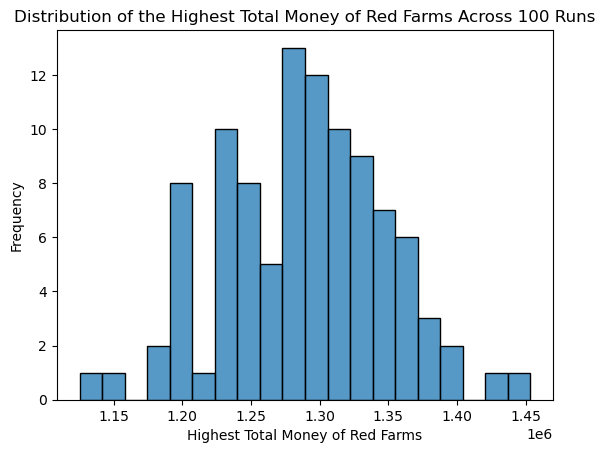

In [ ]:
# graph the average highest money over 100 runs

# BE CAREFUL TO DEAL WITH STEPS OF EACH RUN (e.g. do not duplicate money for each step of a run)
# have to think about the best way to calculate how well a run is doing, since the money can go up and down etc, situation can change over time

# Group by 'run number' and calculate the maximum money value for red farms in each run
max_money_per_run = dataset_filt.groupby('[run number]')['sum [money] of farm-orgs with [org-color = red]'].max()

# Calculate the range of the maximum money values
money_range = max_money_per_run.max() - max_money_per_run.min()
print("The range of the highest total money of red farms across the 100 runs is:", money_range)

# Calculate the interquartile range of the maximum money values
money_iqr = max_money_per_run.quantile(0.75) - max_money_per_run.quantile(0.25)
print("The interquartile range of the highest total money of red farms across the 100 runs is:", money_iqr)

# Calculate the average of the maximum money values
money_avg = max_money_per_run.mean()
print("The average of the highest total money of red farms across the 100 runs is:", money_avg)

# Plot the distribution of the maximum money values
sns.histplot(max_money_per_run, bins=20)
plt.xlabel('Highest Total Money of Red Farms')
plt.ylabel('Frequency')
plt.title('Distribution of the Highest Total Money of Red Farms Across 100 Runs')
plt.show()

# # average profit over 100 runs
# avg_profit = dataset_filt['sum [money] of farm-orgs with [org-color = red]'].mean()

# # calc the range of profits and the interquarter range
# profit_range = dataset_filt['sum [money] of farm-orgs with [org-color = red]'].max() - dataset_filt['sum [money] of farm-orgs with [org-color = red]'].min()
# profit_iqr = dataset_filt['sum [money] of farm-orgs with [org-color = red]'].quantile(0.75) - dataset_filt['sum [money] of farm-orgs with [org-color = red]'].quantile(0.25)

# print('Average profit over 100 runs: ', avg_profit)
# print('Profit range: ', profit_range)
# print('Profit IQR: ', profit_iqr)




In [ ]:
# create a graph of average over time? so calculate the average for each step of each run and then graph average money at timestep t for all steps over all runs
# would need to order the steps by timestep and then calculate the average money at each timestep for all runs
# then graph the average money at each

# Group by 'step' (but no step in this csv but maybe we can make a new csv or within each run, the timesteps should appear sequentially) and calculate the average money value for red farms in each step

# rearrange the dataset so that current-step is the 2nd column
columns = list(dataset_filt.columns)
columns.remove('current-step')
columns.insert(1, 'current-step')
dataset_filt_step = dataset_filt[columns]
# order by run number and then current step
dataset_filt_step = dataset_filt_step.sort_values(by=['[run number]', 'current-step'])
dataset_filt_step.head(10)

# average_money_per_timestep = dataset_filt_step.groupby('current-step')['sum [money] of farm-orgs with [org-color = red]'].mean()

,[run number],current-step,SLRrate,dev-discount-red,run-time,profit-threshold-red,sell-bonus-red,time-btw-buy-red,max-base-cost,look-ahead-red,max-altitude,red-org,min-base-cost,[step],sum [money] of farm-orgs with [org-color = red],sum [farm-agri-output] of farms with [color = red],farm-coordinates
0,1,0,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,0,0.000000,0.000000,[]
1,1,1,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,1,-4391.155470,46.186344,[[39 57]]
2,1,2,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,2,-3929.458562,46.169691,[[39 57]]
3,1,3,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,3,-3467.928171,46.153039,[[39 57]]
4,1,4,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,4,-3006.564282,46.136389,[[39 57]]
5,1,5,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,5,-2545.366884,46.119740,[[39 57]]
6,1,6,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,6,-2084.335961,46.103092,[[39 57]]
7,1,7,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,7,-1623.471502,46.086446,[[39 57]]
8,1,8,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,8,-1162.773493,46.069801,[[39 57]]
9,1,9,0.0088,0.48,300,0,1,15,10000,30,25,True,5000,9,-702.241921,46.053157,[[39 57]]


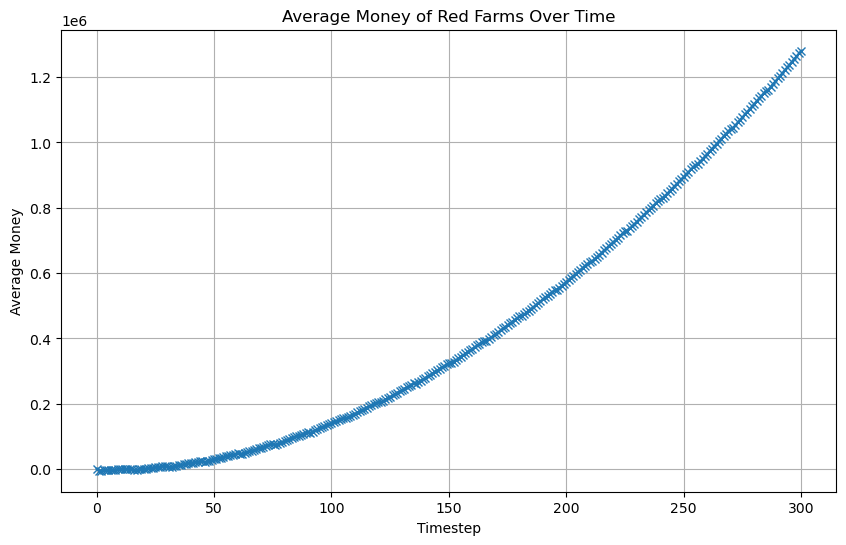

In [32]:
average_money_per_timestep = dataset_filt_step.groupby('current-step')['sum [money] of farm-orgs with [org-color = red]'].mean()

# Plotting the average money over timesteps
plt.figure(figsize=(10, 6))
plt.plot(average_money_per_timestep.index, average_money_per_timestep.values, marker='x', linestyle='-')
plt.title('Average Money of Red Farms Over Time')
plt.xlabel('Timestep')
plt.ylabel('Average Money')
plt.grid(True)
plt.show()

In [1]:
# processing

In [ ]:
# plotting

In [49]:
ds4scred['farm-coordinates'] = ds4scred['farm-coordinates'].apply(parse_coordinates)
# sort the dataset by run number, then step
ds4scred = ds4scred.sort_values(by=['[run number]', '[step]'])
ds4scred.head(10)

,[run number],max-alt-cost-coeff,SLRrate,green-org,starting-temp,look-ahead-blue,dev-discount-red,time-btw-buy-blue,blue-org,run-time,...,look-ahead-red,max-altitude,sell-bonus-blue,sell-bonus-green,red-org,min-base-cost,[step],sum [money] of farm-orgs with [org-color = red],sum [farm-agri-output] of farms with [color = red],farm-coordinates
0,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,0,0.000000,0.000000,[]
1,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,1,-4553.655990,45.971794,"[[32, 43]]"
2,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,2,-4093.938046,45.971794,"[[32, 43]]"
3,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,3,-3634.220101,45.971794,"[[32, 43]]"
4,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,4,-3174.502157,45.971794,"[[32, 43]]"
5,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,5,-2714.784213,45.971794,"[[32, 43]]"
6,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,6,-2255.066269,45.971794,"[[32, 43]]"
7,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,7,-1795.348324,45.971794,"[[32, 43]]"
8,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,8,-1335.630380,45.971794,"[[32, 43]]"
9,1,2,0.0,False,26,80,0.48,15,False,300,...,30,25,1,1,True,5000,9,-875.912436,45.971794,"[[32, 43]]"


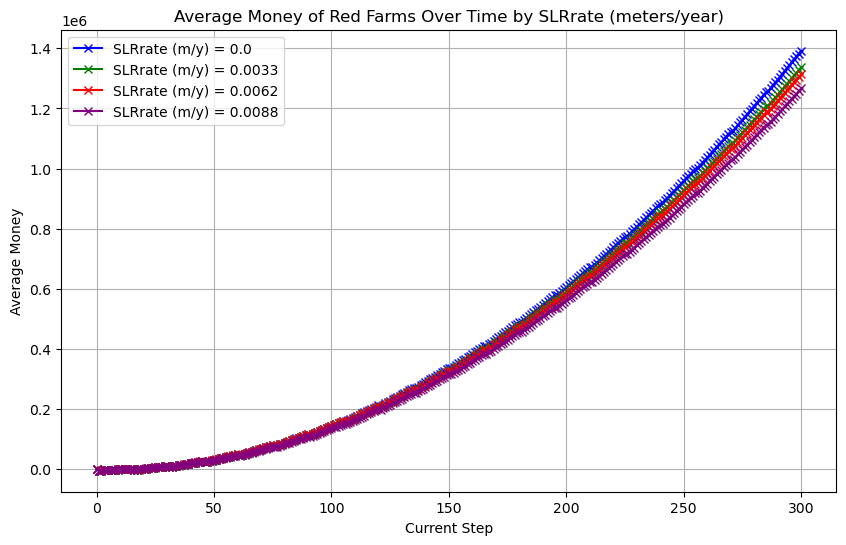

In [62]:
# compare the money over time for the 4 scenarios for SLRrate (0 0.0033 0.0062 0.0088)

# average_money_per_timestep = dataset_filt_step.groupby('current-step')['sum [money] of farm-orgs with [org-color = red]'].mean()

average_money_per_timestep_slrrate = ds4scred.groupby(['SLRrate', '[step]'])['sum [money] of farm-orgs with [org-color = red]'].mean().unstack(level=0)

# # Create a figure and a set of subplots
# fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Adjust the layout as needed
# axs = axs.flatten()  # Flatten the array of axes

# # Plot each SLRrate scenario in a separate subplot
# for i, slrrate in enumerate(average_money_per_timestep_slrrate.columns):
#     axs[i].plot(average_money_per_timestep_slrrate.index, average_money_per_timestep_slrrate[slrrate], marker='x', linestyle='-')
#     axs[i].set_title(f'SLRrate = {slrrate}')
#     axs[i].set_xlabel('Current Step')
#     axs[i].set_ylabel('Average Money')
#     axs[i].grid(True)

# # Adjust layout to prevent overlap
# plt.tight_layout()

# plt.show()
plt.figure(figsize=(10, 6))


colors = ['blue', 'green', 'red', 'purple'] 
marker_size = 3

# Plot each SLRrate scenario on the same graph
for i, slrrate in enumerate(average_money_per_timestep_slrrate.columns):
    plt.plot(average_money_per_timestep_slrrate.index, average_money_per_timestep_slrrate[slrrate], marker='x', linestyle='-', color=colors[i], label=f'SLRrate (m/y) = {slrrate}')

plt.title('Average Money of Red Farms Over Time by SLRrate (meters/year)')
plt.xlabel('Current Step')
plt.ylabel('Average Money')
plt.grid(True)
plt.legend()

plt.savefig('figures/Average_Money_Over_Time_4sc_red.pdf', format='pdf')
plt.show()


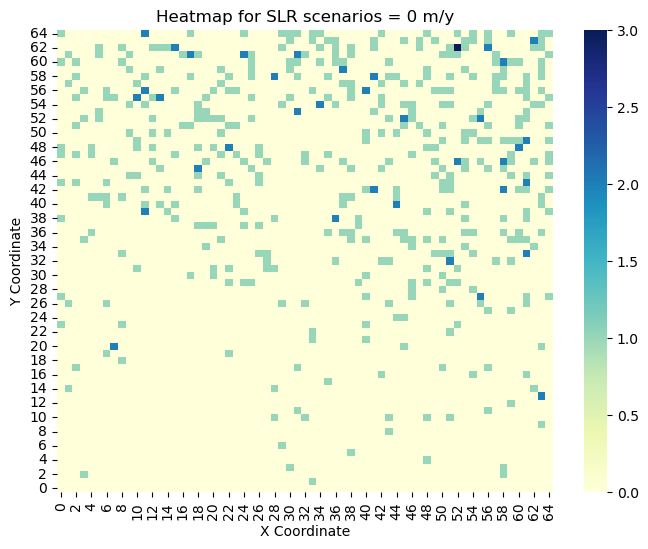

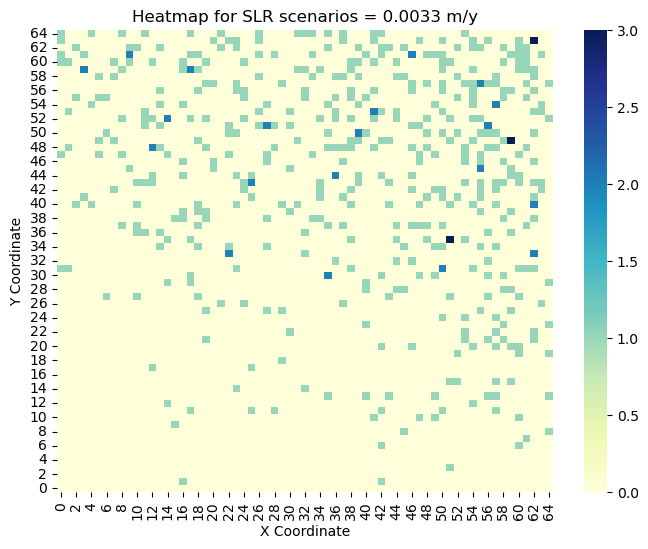

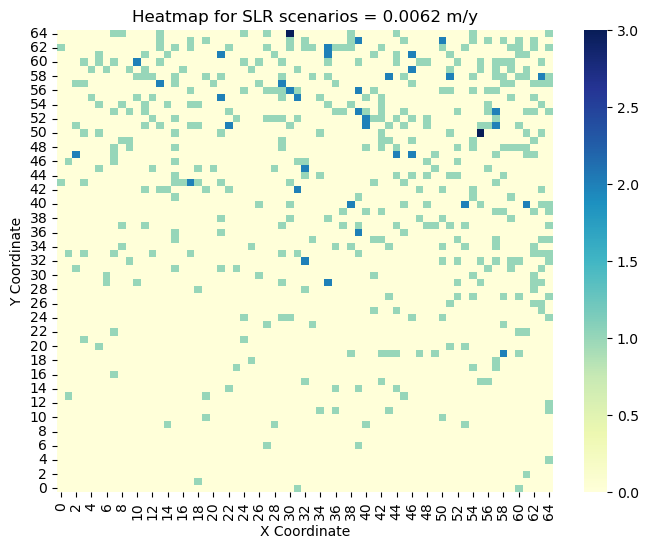

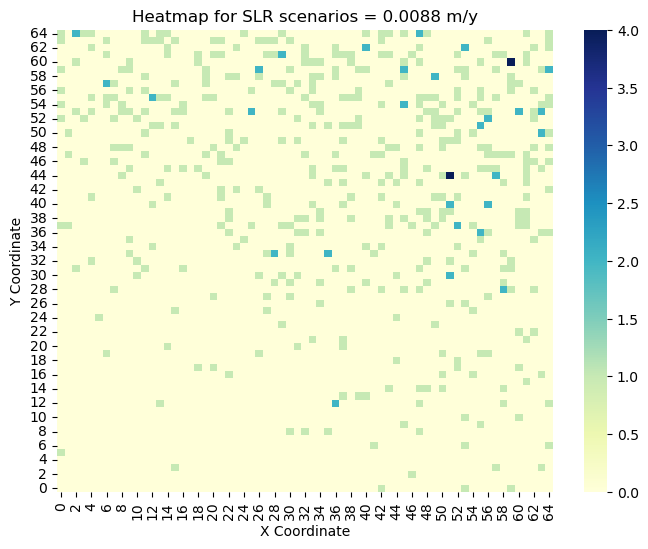

In [70]:
# locations of farms at the end of the simulation for the 4 scenarios

# Create a dictionary of DataFrames, each containing data for a specific SLRrate value
dfs = {rate: ds4scred[ds4scred['SLRrate'] == rate] for rate in ds4scred['SLRrate'].unique()}
df_slrrate_1 = dfs[0]
df_slrrate_2 = dfs[0.0033]
df_slrrate_3 = dfs[0.0062]
df_slrrate_4 = dfs[0.0088]

# print(df_slrrate_1.head())
# print(df_slrrate_2.describe())
# print(df_slrrate_3.info())
# print(df_slrrate_4.shape)

def plot_heatmap(df,la):
    heatmap = np.zeros((65, 65))

    df_lasts = df[df['[step]']==299]

    for index, row in df_lasts.iterrows():
        for coord in row['farm-coordinates']:
            heatmap[coord[0], coord[1]] += 1

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap, cmap="YlGnBu", cbar=True)
    plt.title(f"Heatmap for SLR scenarios = {la} m/y")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.gca().invert_yaxis()
    plt.savefig(f'figures/HeatmapSLR{la}.pdf', format='pdf')
    plt.show()

plot_heatmap(df_slrrate_1,0)
plot_heatmap(df_slrrate_2,0.0033)
plot_heatmap(df_slrrate_3,0.0062)
plot_heatmap(df_slrrate_4,0.0088)


In [82]:
SLRDS = pd.read_csv('results/rcp_experiments/newSLR-red-alt5-la10-table.csv', delimiter=',', skiprows=6, header=0)
SLRDS.head(10)

,[run number],max-alt-cost-coeff,green-org,starting-temp,SLR-rate-0,look-ahead-blue,dev-discount-red,time-btw-buy-blue,SLR-rate-1,blue-org,...,profit-threshold-green,max-altitude,red-org,sell-bonus-blue,sell-bonus-green,min-base-cost,[step],sum [money] of farm-orgs with [org-color = red],sum [farm-agri-output] of farms with [color = red],farm-coordinates
0,8,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.000000,0.000000,[]
1,4,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.000000,0.000000,[]
2,7,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.000000,0.000000,[]
3,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.000000,0.000000,[]
4,5,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.000000,0.000000,[]
5,2,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.000000,0.000000,[]
6,6,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.000000,0.000000,[]
7,5,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,1,-7060.304250,9.915921,[[0 39]]
8,7,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,1,-13446.368833,72.020141,[[60 55]]
9,2,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,1,-8932.068333,51.015857,[[43 12]]


In [83]:
SLRDS['farm-coordinates'] = SLRDS['farm-coordinates'].apply(parse_coordinates)

# sort the dataset by run number
SLRDS = SLRDS.sort_values(by=['[run number]', '[step]'])

# filtering relevant columns
# drop run number, max-alt-cost-coeff, green-org, starting-temp, look-ahead-blue, look-ahead-green, dev-discount-blue, dev-discount-green, time-btw-buy-blue, time-btw-buy-green, blue-org columns
# dataset_filt = SLRDS.drop(columns=['max-alt-cost-coeff', 'green-org', 'starting-temp', 'look-ahead-blue', 'look-ahead-green', 'dev-discount-blue', 'dev-discount-green', 'time-btw-buy-blue', 'time-btw-buy-green', 'blue-org', 'profit-threshold-blue', 'profit-threshold-green', 'sell-bonus-green', 'sell-bonus-blue'])


SLRDS.head(10)

,[run number],max-alt-cost-coeff,green-org,starting-temp,SLR-rate-0,look-ahead-blue,dev-discount-red,time-btw-buy-blue,SLR-rate-1,blue-org,...,profit-threshold-green,max-altitude,red-org,sell-bonus-blue,sell-bonus-green,min-base-cost,[step],sum [money] of farm-orgs with [org-color = red],sum [farm-agri-output] of farms with [color = red],farm-coordinates
3,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.000000,0.00000,[]
12,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,1,-10701.639000,67.17877,"[[56, 29]]"
16,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,2,-10029.851302,67.17877,"[[56, 29]]"
26,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,3,-9358.063604,67.17877,"[[56, 29]]"
42,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,4,-8686.275907,67.17877,"[[56, 29]]"
52,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,5,-8014.488209,67.17877,"[[56, 29]]"
65,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,6,-7342.700511,67.17877,"[[56, 29]]"
70,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,7,-6670.912813,67.17877,"[[56, 29]]"
76,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,8,-5999.125115,67.17877,"[[56, 29]]"
86,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,9,-5327.337418,67.17877,"[[56, 29]]"


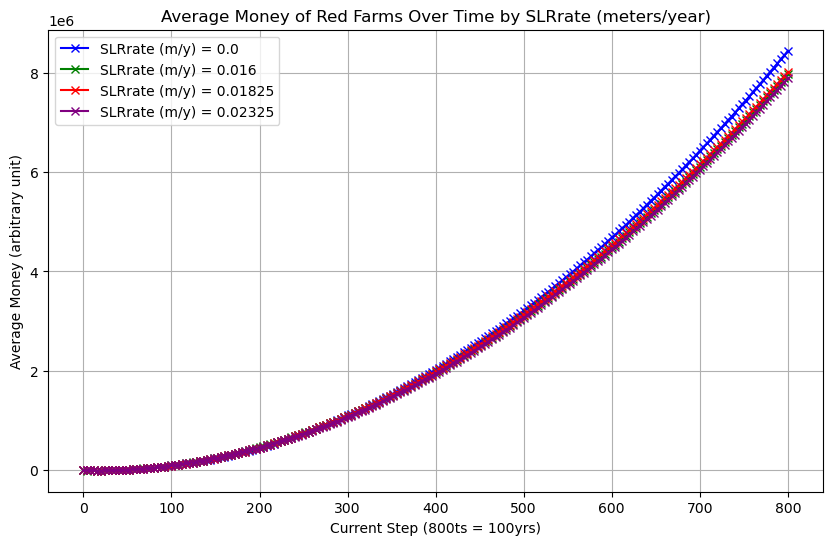

In [94]:
# AVerage money over time for the SLR scenario
# compare the money over time for the 4 scenarios for SLRrate (0 0.0033 0.0062 0.0088)

# average_money_per_timestep = dataset_filt_step.groupby('current-step')['sum [money] of farm-orgs with [org-color = red]'].mean()

average_money_per_timestep_slrrate = SLRDS.groupby(['SLR-rate-0', '[step]'])['sum [money] of farm-orgs with [org-color = red]'].mean().unstack(level=0)
sampled__av_money = average_money_per_timestep_slrrate.iloc[::4]

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple'] 
marker_size = 2

# Plot each SLRrate scenario on the same graph
for i, slrrate in enumerate(sampled__av_money.columns):
    plt.plot(sampled__av_money.index, sampled__av_money[slrrate], marker='x', linestyle='-', color=colors[i], label=f'SLRrate (m/y) = {slrrate}')

plt.title('Average Money of Red Farms Over Time by SLRrate (meters/year)')
plt.xlabel('Current Step (800ts = 100yrs)')
plt.ylabel('Average Money (arbitrary unit)')
plt.grid(True)
plt.legend()

plt.savefig('figures/Average_Money_Over_Time_4sc_red.pdf', format='pdf')
plt.show()


Average money over time for a longer time scale

In [ ]:
SLRDS300y = pd.read_csv('results/rcp_experiments/newSLR-red-alt5-la10-ts300y-table.csv', delimiter=',', skiprows=6, header=0)
SLRDS300y.head(10)
# Average money over time for a longer time scale

SLRDS300y['farm-coordinates'] = SLRDS300y['farm-coordinates'].apply(parse_coordinates)

# sort the dataset by run number
SLRDS300y = SLRDS300y.sort_values(by=['[run number]', '[step]'])

# filtering relevant columns
# drop run number, max-alt-cost-coeff, green-org, starting-temp, look-ahead-blue, look-ahead-green, dev-discount-blue, dev-discount-green, time-btw-buy-blue, time-btw-buy-green, blue-org columns
# dataset_filt = SLRDS.drop(columns=['max-alt-cost-coeff', 'green-org', 'starting-temp', 'look-ahead-blue', 'look-ahead-green', 'dev-discount-blue', 'dev-discount-green', 'time-btw-buy-blue', 'time-btw-buy-green', 'blue-org', 'profit-threshold-blue', 'profit-threshold-green', 'sell-bonus-green', 'sell-bonus-blue'])


SLRDS300y.head(10)

,[run number],max-alt-cost-coeff,green-org,starting-temp,SLR-rate-0,look-ahead-blue,dev-discount-red,time-btw-buy-blue,SLR-rate-1,blue-org,...,profit-threshold-green,max-altitude,red-org,sell-bonus-blue,sell-bonus-green,min-base-cost,[step],sum [money] of farm-orgs with [org-color = red],sum [farm-agri-output] of farms with [color = red],farm-coordinates
0,3,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.00000,0.000000,[]
1,6,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.00000,0.000000,[]
2,7,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.00000,0.000000,[]
3,5,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.00000,0.000000,[]
4,2,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.00000,0.000000,[]
5,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.00000,0.000000,[]
6,8,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.00000,0.000000,[]
7,5,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,1,-11085.34375,49.569133,[[42 31]]
8,6,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,1,-10610.97300,68.850945,[[57 2]]
9,3,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,1,-9556.13250,18.368191,[[5 17]]


In [ ]:
# Average money over time for a longer time scale

SLRDS300y['farm-coordinates'] = SLRDS300y['farm-coordinates'].apply(parse_coordinates)

# sort the dataset by run number
SLRDS300y = SLRDS300y.sort_values(by=['[run number]', '[step]'])

# filtering relevant columns
# drop run number, max-alt-cost-coeff, green-org, starting-temp, look-ahead-blue, look-ahead-green, dev-discount-blue, dev-discount-green, time-btw-buy-blue, time-btw-buy-green, blue-org columns
# dataset_filt = SLRDS.drop(columns=['max-alt-cost-coeff', 'green-org', 'starting-temp', 'look-ahead-blue', 'look-ahead-green', 'dev-discount-blue', 'dev-discount-green', 'time-btw-buy-blue', 'time-btw-buy-green', 'blue-org', 'profit-threshold-blue', 'profit-threshold-green', 'sell-bonus-green', 'sell-bonus-blue'])


SLRDS300y.head(10)

,[run number],max-alt-cost-coeff,green-org,starting-temp,SLR-rate-0,look-ahead-blue,dev-discount-red,time-btw-buy-blue,SLR-rate-1,blue-org,...,profit-threshold-green,max-altitude,red-org,sell-bonus-blue,sell-bonus-green,min-base-cost,[step],sum [money] of farm-orgs with [org-color = red],sum [farm-agri-output] of farms with [color = red],farm-coordinates
5,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,0,0.000000,0.000000,[]
14,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,1,-8343.720000,15.886144,"[[21, 12]]"
28,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,2,-8184.858564,15.886144,"[[21, 12]]"
44,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,3,-8025.997128,15.886144,"[[21, 12]]"
69,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,4,-7867.135691,15.886144,"[[21, 12]]"
95,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,5,-7708.274255,15.886144,"[[21, 12]]"
121,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,6,-7549.412819,15.886144,"[[21, 12]]"
134,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,7,-7390.551383,15.886144,"[[21, 12]]"
146,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,8,-7231.689947,15.886144,"[[21, 12]]"
177,1,2,False,26,0.0,80,0,15,0.042,False,...,0,5,True,1,1,4000,9,-7072.828511,15.886144,"[[21, 12]]"


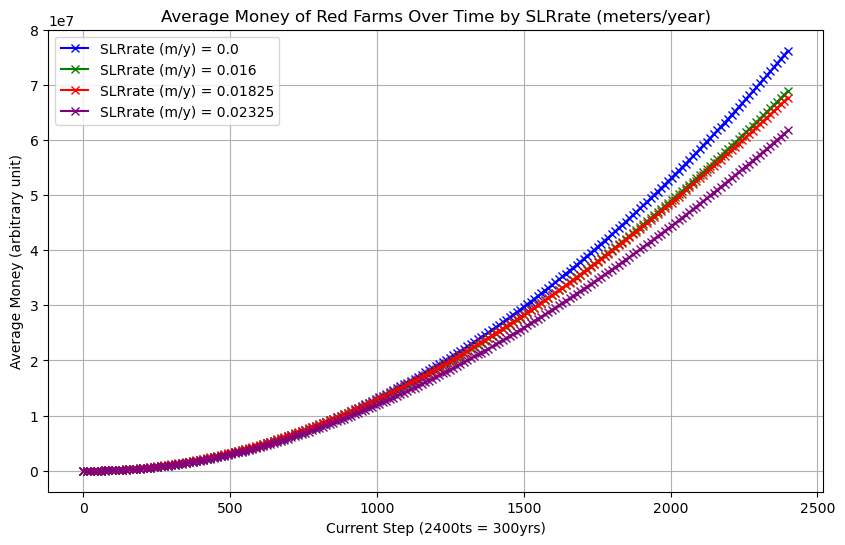

In [95]:
# AVerage money over time for the SLR scenario
# compare the money over time for the 4 scenarios for SLRrate (0 0.0033 0.0062 0.0088)

# average_money_per_timestep = dataset_filt_step.groupby('current-step')['sum [money] of farm-orgs with [org-color = red]'].mean()

average_money_per_timestep_slrrate_300y = SLRDS300y.groupby(['SLR-rate-0', '[step]'])['sum [money] of farm-orgs with [org-color = red]'].mean().unstack(level=0)
sampled__av_money_300y = average_money_per_timestep_slrrate_300y.iloc[::12]

# # Create a figure and a set of subplots
# fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Adjust the layout as needed
# axs = axs.flatten()  # Flatten the array of axes

# # Plot each SLRrate scenario in a separate subplot
# for i, slrrate in enumerate(average_money_per_timestep_slrrate.columns):
#     axs[i].plot(average_money_per_timestep_slrrate.index, average_money_per_timestep_slrrate[slrrate], marker='x', linestyle='-')
#     axs[i].set_title(f'SLRrate = {slrrate}')
#     axs[i].set_xlabel('Current Step')
#     axs[i].set_ylabel('Average Money')
#     axs[i].grid(True)

# # Adjust layout to prevent overlap
# plt.tight_layout()

# plt.show()
plt.figure(figsize=(10, 6))


colors = ['blue', 'green', 'red', 'purple'] 
marker_size = 2

# Plot each SLRrate scenario on the same graph
for i, slrrate in enumerate(sampled__av_money_300y.columns):
    plt.plot(sampled__av_money_300y.index, sampled__av_money_300y[slrrate], marker='x', linestyle='-', color=colors[i], label=f'SLRrate (m/y) = {slrrate}')

plt.title('Average Money of Red Farms Over Time by SLRrate (meters/year)')
plt.xlabel('Current Step (2400ts = 300yrs)')
plt.ylabel('Average Money (arbitrary unit)')
plt.grid(True)
plt.legend()

plt.savefig('figures/Average_Money_Over_Time_4sc_red_300y.pdf', format='pdf')
plt.show()


HEATMAP OF 4 DIFFERENT SLR SCENARIOS

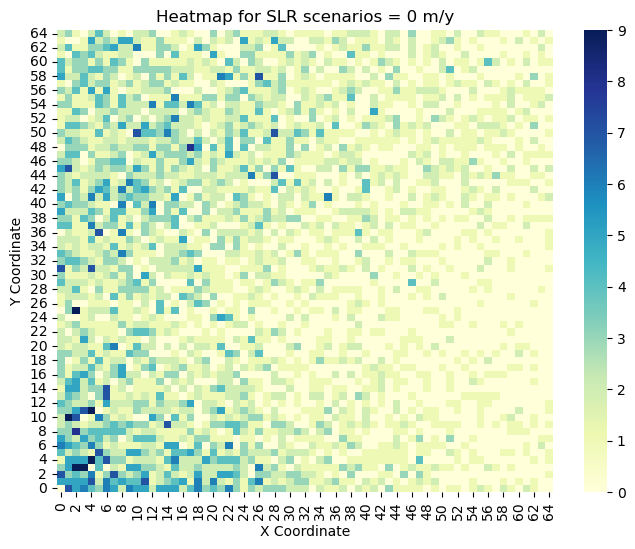

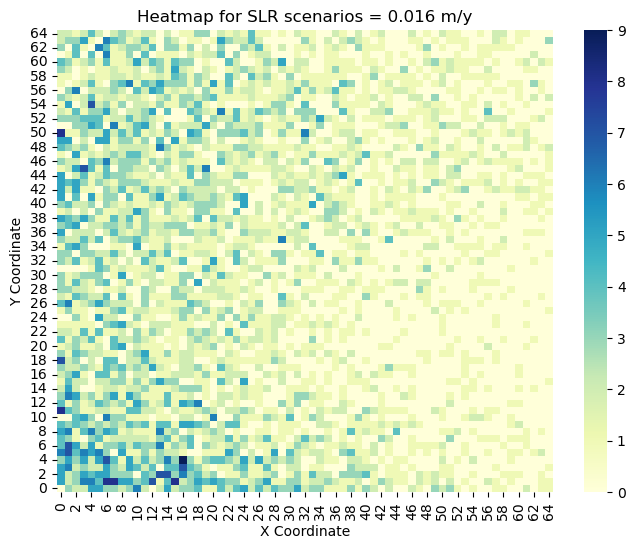

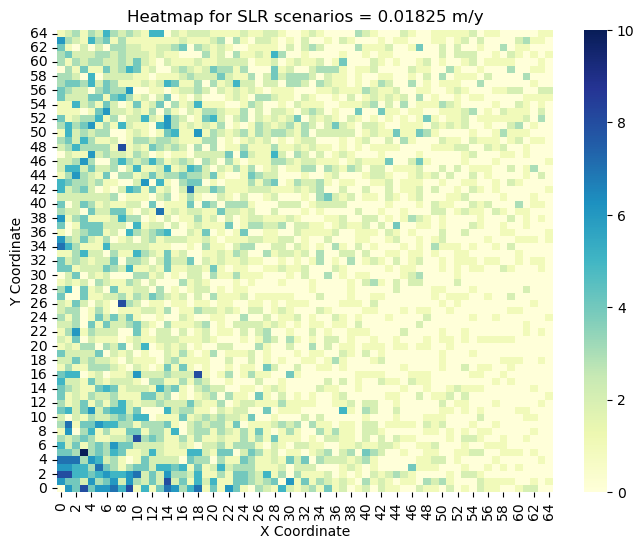

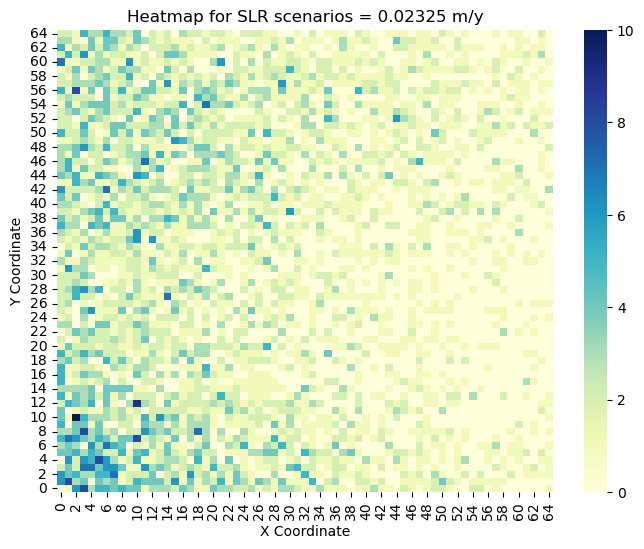

In [ ]:
# HEATMAP 4 scenarios! MAXALTITUDE = 5
# locations of farms at the end of the simulation for the 4 scenarios

# Create a dictionary of DataFrames, each containing data for a specific SLRrate value
dfs = {rate: SLRDS[SLRDS['SLR-rate-0'] == rate] for rate in SLRDS['SLR-rate-0'].unique()}
df_slrrate_1 = dfs[0]
df_slrrate_2 = dfs[0.016]
df_slrrate_3 = dfs[0.01825]
df_slrrate_4 = dfs[0.02325]

# print(df_slrrate_1.head())
# print(df_slrrate_2.describe())
# print(df_slrrate_3.info())
# print(df_slrrate_4.shape)

def plot_heatmap(df,la):
    heatmap = np.zeros((65, 65))

    df_lasts = df[df['[step]']==799]

    for index, row in df_lasts.iterrows():
        for coord in row['farm-coordinates']:
            heatmap[coord[0], coord[1]] += 1

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap, cmap="YlGnBu", cbar=True)
    plt.title(f"Heatmap for SLR scenarios = {la} m/y")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.gca().invert_yaxis()
    plt.savefig(f'figures/HeatmapNewSLR{la}.pdf', format='pdf')
    plt.show()

plot_heatmap(df_slrrate_1,0)
plot_heatmap(df_slrrate_2,0.016)
plot_heatmap(df_slrrate_3,0.01825)
plot_heatmap(df_slrrate_4,0.02325)


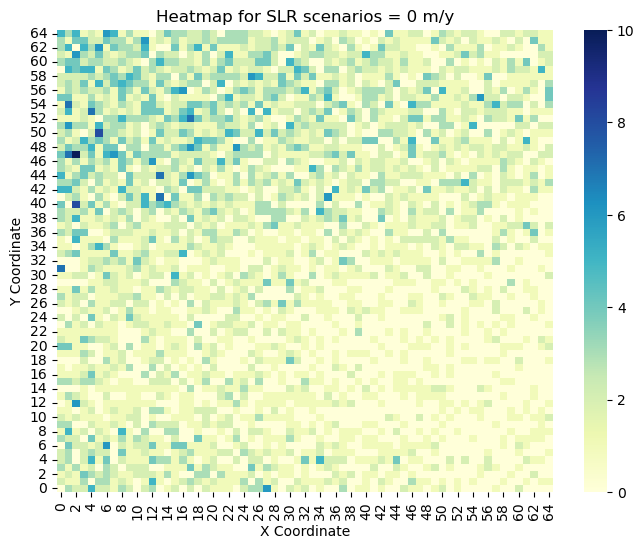

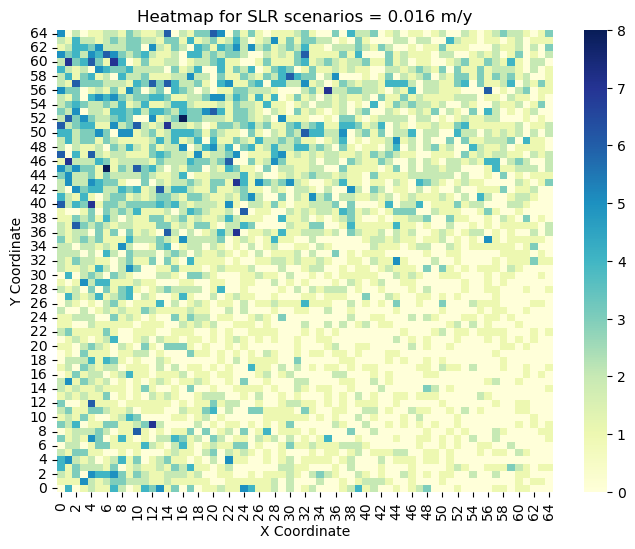

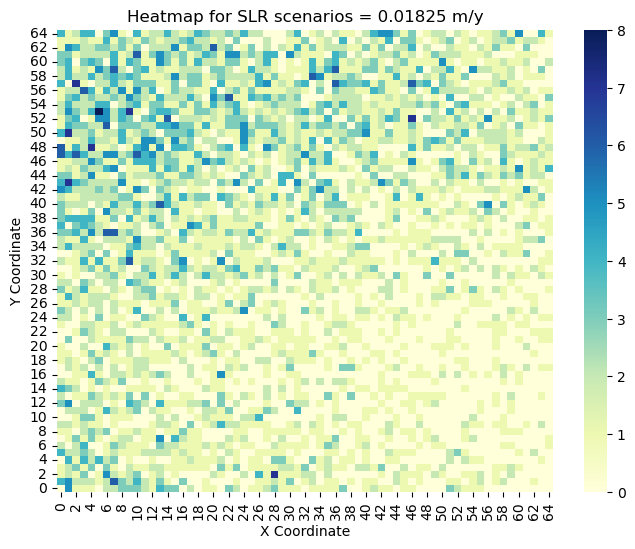

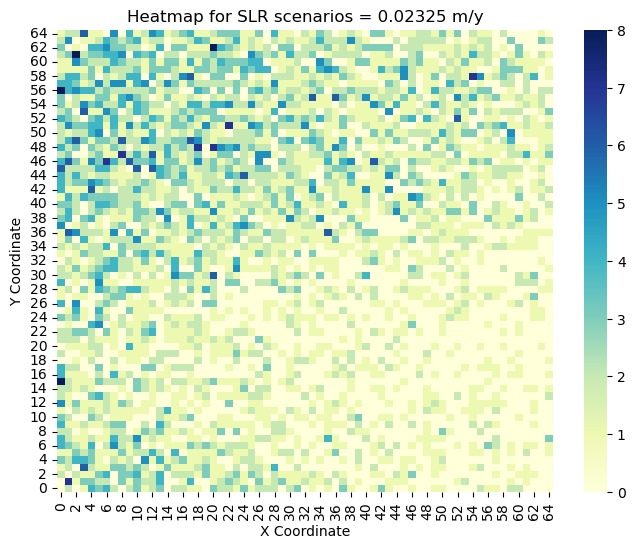

In [98]:
# HEATMAPS FOR MAXALTITUDE = 25
# HEATMAP 4 scenarios!
# locations of farms at the end of the simulation for the 4 scenarios

SLRDSalt25 = pd.read_csv('results/rcp_experiments/newSLR-red-alt25-la10-table.csv', delimiter=',', skiprows=6, header=0)
# SLRDSalt25.head(10)
# Average money over time for a longer time scale

SLRDSalt25['farm-coordinates'] = SLRDSalt25['farm-coordinates'].apply(parse_coordinates)
# sort the dataset by run number
SLRDSalt25 = SLRDSalt25.sort_values(by=['[run number]', '[step]'])


# Create a dictionary of DataFrames, each containing data for a specific SLRrate value
dfs = {rate: SLRDSalt25[SLRDSalt25['SLR-rate-0'] == rate] for rate in SLRDSalt25['SLR-rate-0'].unique()}
df_slrrate_1 = dfs[0]
df_slrrate_2 = dfs[0.016]
df_slrrate_3 = dfs[0.01825]
df_slrrate_4 = dfs[0.02325]

def plot_heatmap(df,la):
    heatmap = np.zeros((65, 65))

    df_lasts = df[df['[step]']==799]

    for index, row in df_lasts.iterrows():
        for coord in row['farm-coordinates']:
            heatmap[coord[0], coord[1]] += 1

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap, cmap="YlGnBu", cbar=True)
    plt.title(f"Heatmap for SLR scenarios = {la} m/y")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.gca().invert_yaxis()
    plt.savefig(f'figures/HeatmapNewSLR{la}ALT25.pdf', format='pdf')
    plt.show()

plot_heatmap(df_slrrate_1,0)
plot_heatmap(df_slrrate_2,0.016)
plot_heatmap(df_slrrate_3,0.01825)
plot_heatmap(df_slrrate_4,0.02325)


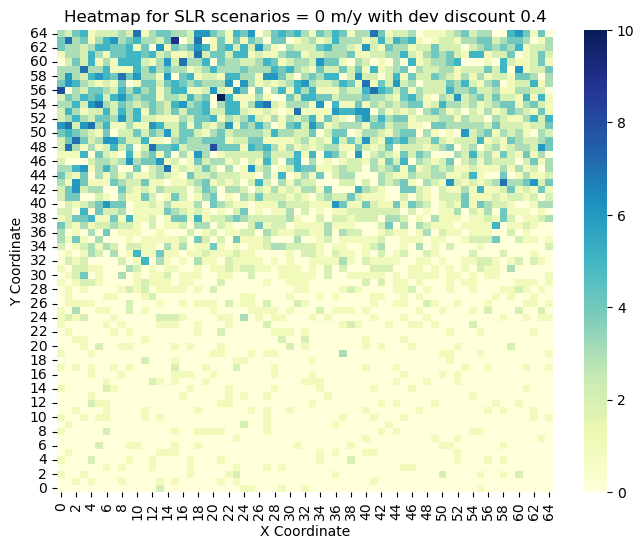

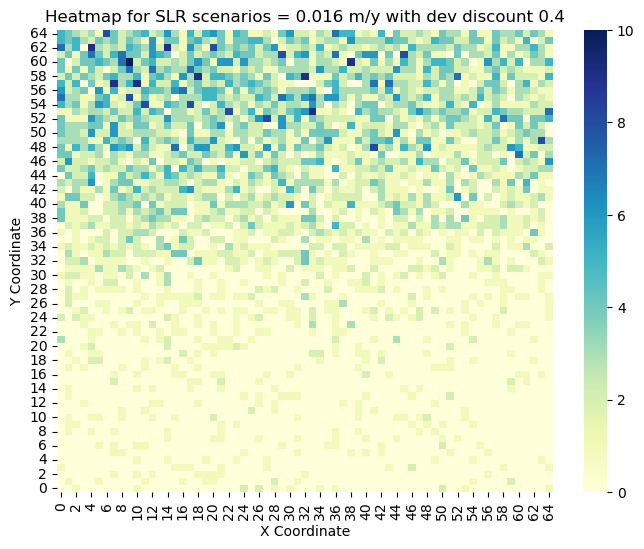

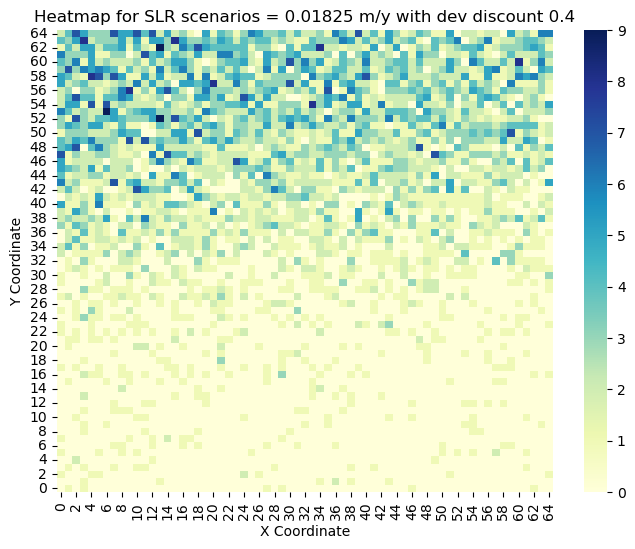

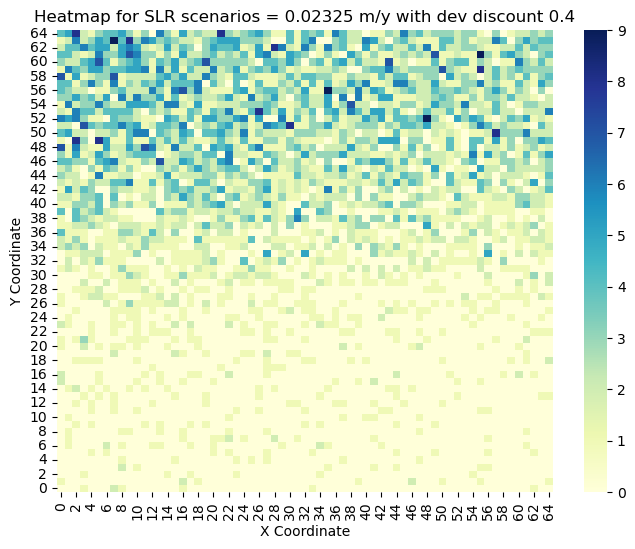

In [ ]:
# HEATMAPS FOR MAXAltitude 25 and dev discount 0.4

SLRDSalt25dev4 = pd.read_csv('results/rcp_experiments/newSLR-red-alt25-la10-devd4-table.csv', delimiter=',', skiprows=6, header=0)

SLRDSalt25dev4['farm-coordinates'] = SLRDSalt25dev4['farm-coordinates'].apply(parse_coordinates)
# sort the dataset by run number
SLRDSalt25dev4 = SLRDSalt25dev4.sort_values(by=['[run number]', '[step]'])


# Create a dictionary of DataFrames, each containing data for a specific SLRrate value
dfs = {rate: SLRDSalt25dev4[SLRDSalt25dev4['SLR-rate-0'] == rate] for rate in SLRDSalt25dev4['SLR-rate-0'].unique()}
df_slrrate_1 = dfs[0]
df_slrrate_2 = dfs[0.016]
df_slrrate_3 = dfs[0.01825]
df_slrrate_4 = dfs[0.02325]

def plot_heatmap(df,la):
    heatmap = np.zeros((65, 65))

    df_lasts = df[df['[step]']==799]

    for index, row in df_lasts.iterrows():
        for coord in row['farm-coordinates']:
            heatmap[coord[0], coord[1]] += 1

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap, cmap="YlGnBu", cbar=True)
    plt.title(f"Heatmap for SLR scenarios = {la} m/y with dev discount 0.4")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.gca().invert_yaxis()
    plt.savefig(f'figures/HeatmapNewSLR{la}ALT25DEV4.pdf', format='pdf')
    plt.show()

plot_heatmap(df_slrrate_1,0)
plot_heatmap(df_slrrate_2,0.016)
plot_heatmap(df_slrrate_3,0.01825)
plot_heatmap(df_slrrate_4,0.02325)

